In [3]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [94]:
df = yf.download(tickers='BTC_USD',start='2000-01-01')[['Adj Close']].copy()
df

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC_USD: No data found, symbol may be delisted


,Adj Close
Date,


<AxesSubplot:xlabel='Date'>

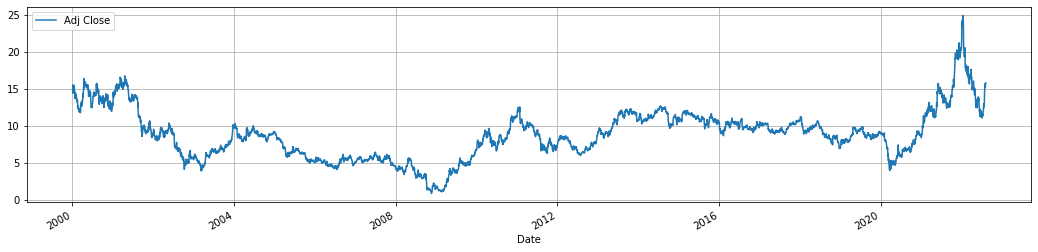

In [84]:
df.plot(figsize=(18,4), grid=True)

In [85]:
df['Fast']=df['Adj Close'].rolling(window=42).mean()
df['Slow']=df['Adj Close'].rolling(window=252).mean()

<AxesSubplot:xlabel='Date'>

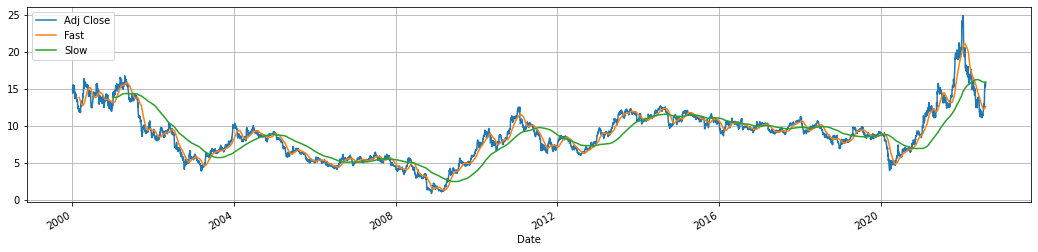

In [86]:
df.plot(figsize=(18,4),grid=True)

<AxesSubplot:xlabel='Date'>

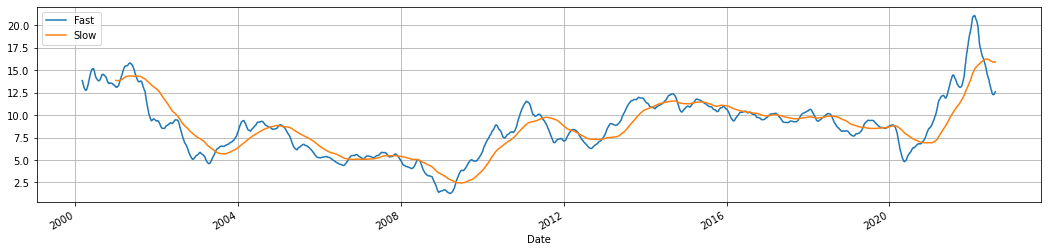

In [87]:
cols = ['Fast','Slow']
df[cols].plot(figsize=(18,4),grid=True)

<AxesSubplot:xlabel='Date'>

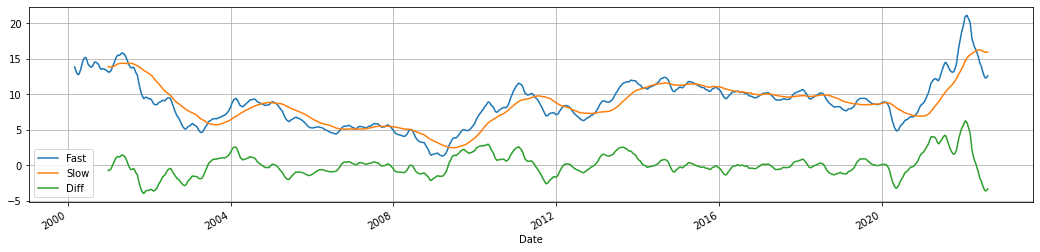

In [88]:
df['Diff'] = df['Fast']-df['Slow']
cols = ['Fast','Slow','Diff']
df[cols].plot(figsize=(18,4),grid=True)

# Add Rules of the Trading Strategy
ratio = Diff/Slow
- LONG - when the ratio > threshold
- LONG - when the ratio < -threshold
- CASH when inbetween

In [89]:
LONG = 1
SHORT = -1
CASH = 0

threshold = 0.03

df['Pos'] = np.where(df['Diff']/df['Slow'] > threshold, LONG, CASH)
df['Pos'] = np.where(df['Diff']/df['Slow'] < -threshold, SHORT, df['Pos'])

<AxesSubplot:xlabel='Date'>

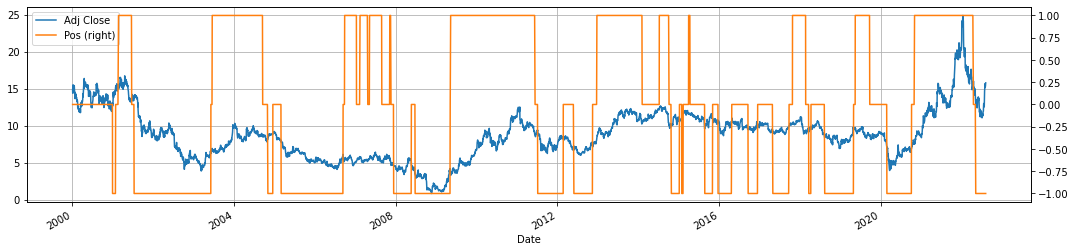

In [90]:
cols = ['Adj Close', 'Pos']
df[cols].plot(figsize=(18,4), grid=True, secondary_y='Pos')

<AxesSubplot:xlabel='Date'>

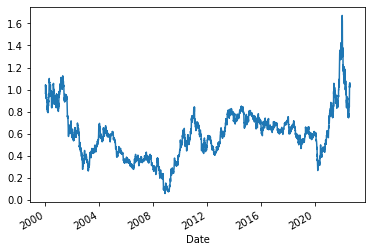

In [91]:
df['Market'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['Market'].cumsum().apply(np.exp).plot()

<AxesSubplot:xlabel='Date'>

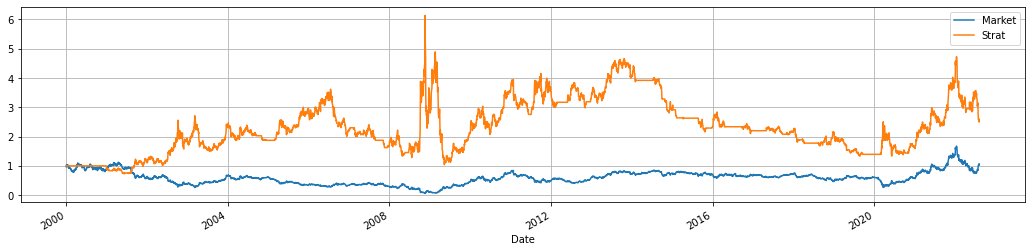

In [92]:
df['Market'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['Strat']=df['Pos'].shift(1)*df['Market']
cols=['Market','Strat']
df[cols].cumsum().apply(np.exp).plot(figsize=(18,4), grid=True)

In [93]:
mkt,strat = df[cols].cumsum().apply(np.exp).iloc[-1]
print(f'Market = {np.round(mkt,2)}')
print(f'Strat = {np.round(strat,2)}')
print(f'Strat/Market = {np.round(strat/mkt,2)}')

Market = 1.06
Strat = 2.5
Strat/Market = 2.36
